<a href="https://colab.research.google.com/github/amrit100612/Internship-program_26/blob/main/Day_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine learning Performmance Metrrics:
---------------------------------------------

* True Positive(TP) -> Predicted Positive and Actual Positive. eg. patients has cancer , and the model correctly say they do.

* False Positive(FP)-> Predicted Positive but Actual Negative . eg. patient is healthy , but the model incorrectly say they have cancer.
---------------------------------------------

* False Negative(FN) -> Predicted negative but actually Positive.
 eg. person has cancer , but model say that they are healthy.

* True Negative(TN) -> Predicit negative and actually Negative.
. eg. Patient is healthy, and model say it correctly.
---------------------------------------------
* Precision vs Recall: Critical Trade-off
* Accuracy : Overall Correction
* F1 Score : Balanced Avg.
---------------------------------------------

* Accuraccy Trap :    
 Defination : Accuracy = (TP+TN)/ Total Pred.
====================================================


* Precision: (TP/{TP+FP}) -> TYPE 1 Error (Business) -> Spam filter, Recommendation
==================================================================

* Recall : (TP/{TP+FN}) -> TYPE 2 Error (Medical) -> Disease Screening, Fraud
===============================================================


* Specificity: Flip side of reecall

 * Specificity (True Negative Rate): (TN/ TN+FP)  
 -------------------------------------------------------


* Finding Balance : F1 Score -> F1 = 2* (Precision * Recall)/(Precision + Recall)
========================================================

-----------------------------------------------------------------

ROC Curve
AUC : Area under curve :

1.   AUC = 0.5 : Random Guess
2.   AUC = 1.0 : Perfect Pred.
3.   AUC = 0.0 : Perfectly Wrong  

-------------------------------------------------------------------------



* MAE & RMSE : Use RMSE when a single large error is unacceptable

* R2 shows the Variance of the data(Scatterness)

Condition             &         Recommendation Metric


*   DATA is imbalanceed             ==      F1 score

*   High cost of false negative   == REcall



*   HIgh cost of False positive  == Precision
*   Need probabilistic Ranking  == AUC/ Log Loss

*   Large Outlier are unacceptiable  == RMSE
*   Need simple interpretability == MAE

* KNN : Distance & Neighbor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [7]:
df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
77   1    4                125  304          0             2            162     1                0.0            1            3                        3         Presence         1
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
34   0    2                118  210          0             0            192     0                0.7            1            0                        3         Absence          1
     1    1                118  182          0             2            174     0                0.0            1            0                        3         Absence          1
35   0    4                138  183          0             0            182     0                1.4            1            0                        3         Absence          1
                                                                                                                                                                                ..
41   0    3                112  268          0             2            172     1                0.0            1            0                        3         Absence          1
          2                130  204          0             2            172     0                1.4            1            0                        3         Absence          1
                           126  306          0             0            163     0                0.0            1            0                        3         Absence          1
                           105  198          0             0            168     0                0.0            1            1                        3         Absence          1
40   1    4                152  223          0             0            181     0                0.0            1            0                        7         Presence         1
Name: count, Length: 270, dtype: int64

In [12]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns identified :\n", numerical_cols)

Numerical columns identified :
 ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


/tmp/ipython-input-524973599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['BP'],palette='viridis')


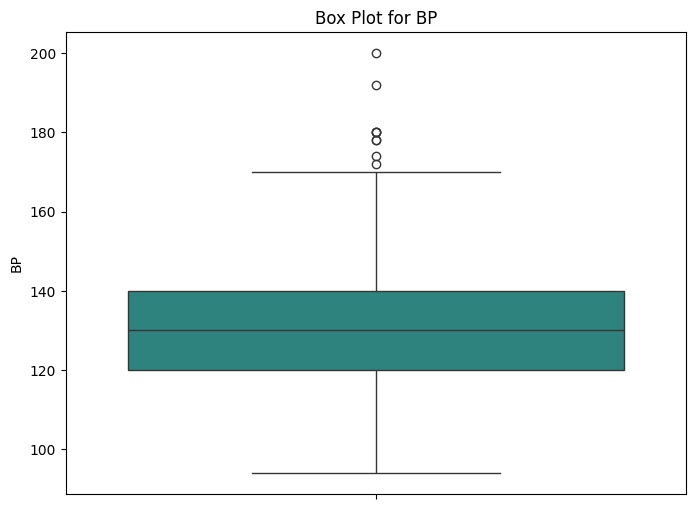

In [20]:
from sklearn import datasets

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BP'],palette='viridis')
plt.title('Box Plot for BP')
plt.show()